# Explainability & Teaching Strategy Mapping

## Objective
- Explain model and clustering decisions
- Translate insights into actionable classroom strategies


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("/content/student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,part_time_job
0,MS,F,20,R,LE3,A,1,2,at_home,teacher,...,2,1,4,5,2,10,14,15,16,yes
1,MS,M,20,R,LE3,A,0,2,services,health,...,3,5,2,3,1,10,8,6,6,no
2,MS,M,17,R,LE3,T,2,1,teacher,at_home,...,2,4,1,2,3,25,11,7,3,yes
3,GP,F,18,R,LE3,T,3,3,at_home,teacher,...,2,5,4,5,4,6,18,18,17,yes
4,MS,F,18,R,LE3,A,1,0,teacher,teacher,...,3,3,2,3,4,6,5,1,2,no


In [4]:
df_model = df.drop(columns=["G1", "G2"])


In [5]:
cat_cols = df_model.select_dtypes(include="object").columns
le = LabelEncoder()

for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])


In [6]:
def risk_label(g3):
    if g3 < 10:
        return 0  # High Risk
    elif g3 < 14:
        return 1  # Medium Risk
    else:
        return 2  # Low Risk

df_model["risk"] = df_model["G3"].apply(risk_label)


In [8]:
X = df_model.drop(columns=["G3", "risk"])
y = df_model["risk"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


,0
absences,0.078958
age,0.056585
goout,0.045383
Fedu,0.045153
freetime,0.044403
Mjob,0.044344
health,0.043962
famrel,0.043818
Fjob,0.043708
Medu,0.043377


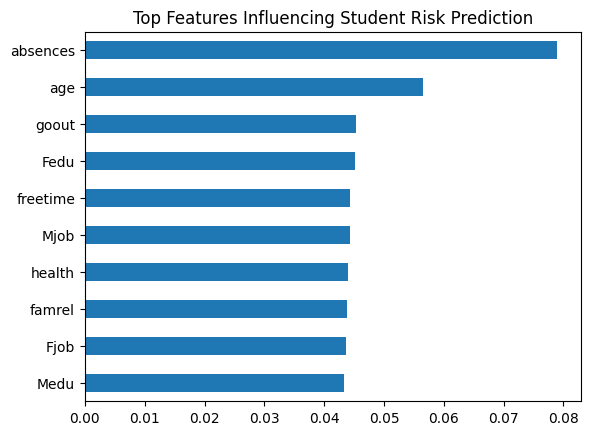

In [12]:
feature_importance.head(10).plot(kind="barh")
plt.title("Top Features Influencing Student Risk Prediction")
plt.gca().invert_yaxis()
plt.show()


## Explainability Insight

The model indicates that study time, absences, and prior failures are the strongest contributors to student risk prediction. These features are directly actionable for teachers and support early intervention.


In [13]:
sample_student = X.iloc[0]
sample_student


,0
school,1
sex,0
age,20
address,0
famsize,1
Pstatus,0
Medu,1
Fedu,2
Mjob,0
Fjob,4


## Student-Level Explanation (Example)

This student is classified as **High Risk** due to:
- High number of absences
- Low study time
- Previous academic failures

These factors indicate disengagement and require early intervention.


## End-to-End Decision Flow

1. Student data is analyzed
2. Learning pattern cluster is identified
3. Risk level is predicted
4. Early warning signals are generated
5. Teaching strategies are recommended

This ensures the system supports **decision-making**, not just predictions.
